# IMERG products

The IMERG algorithms intercalibrate, merge, and interpolate satellite Passive Microwave (PMW) precipitation estimates, together with microwave-calibrated infrared (IR) satellite estimates, precipitation gauge analyses, and potentially other precipitation estimators at fine time and space scales for the TRMM and GPM eras over the entire globe.

The IMERG-ER (Early Run) and IMERG-LR (Late Run) products are considered Near-Real-Time (NRT) products. 

IMERG-ER is available 4 hours from NRT, while IMERG-LR is available after 12 hours.
The IMERG-FR (Final Run) product is instead produced with a delay of at least 3.5 months.

For more information on the IMERG products, please read the corresponding product technical documentation:
- [IMERG FR](https://gpm.nasa.gov/taxonomy/term/1417)
- [IMERG LR](https://gpm.nasa.gov/taxonomy/term/1415)
- [IMERG ER](https://gpm.nasa.gov/taxonomy/term/1357)

-------------------------------------------------------------------

Now let's import the package required in this tutorial.

In [1]:
import datetime

import gpm

Let's have a look at the available IMERG products:

In [2]:
gpm.available_products(product_categories="IMERG", product_types="RS")

['IMERG-FR']

In [3]:
gpm.available_products(product_categories="IMERG", product_types="NRT")

['IMERG-ER', 'IMERG-LR']

## 1. Data Download

Now let's download an IMERG product over a couple of hours.

In [4]:
# Specify the time period you are interested in
start_time = datetime.datetime.strptime("2019-07-13 11:00:00", "%Y-%m-%d %H:%M:%S")
end_time = datetime.datetime.strptime("2019-07-13 13:00:00", "%Y-%m-%d %H:%M:%S")

# Specify the product and product type
product = "IMERG-FR"  # 'IMERG-ER' 'IMERG-LR'
product_type = "RS"   # "NRT"

# Specify the version
version = 7

In [5]:
# Download the data
gpm.download(
    product=product,
    product_type=product_type,
    version=version,
    start_time=start_time,
    end_time=end_time,
    force_download=False,
    verbose=True,
    progress_bar=True,
    check_integrity=False,
)


All the available GPM IMERG-FR product files are already on disk.


Once, the data are downloaded on disk, let's load the IMERG product and look at the dataset structure.

## 2. Data Loading

In [6]:
# Load IMERG dataset
ds = gpm.open_dataset(
    product=product,
    product_type=product_type,
    version=version,
    start_time=start_time,
    end_time=end_time,
)
ds

/home/ghiggi/Python_Packages/gpm/gpm/dataset/conventions.py:42: GPM_Warning: 'The dataset start at 2019-07-13 11:30:00, although the specified start_time is 2019-07-13 11:00:00.'
  warnings.warn(msg, GPM_Warning)
/home/ghiggi/Python_Packages/gpm/gpm/dataset/dataset.py:269: GPM_Warning: 'The GPM Dataset has missing granules !'
  warnings.warn(msg, GPM_Warning)


<xarray.Dataset>
Dimensions:                         (time: 4, lon: 3600, lat: 1800)
Coordinates:
  * time                            (time) datetime64[ns] 2019-07-13T11:30:00...
  * lon                             (lon) float32 -179.9 -179.9 ... 179.9 179.9
  * lat                             (lat) float32 -89.95 -89.85 ... 89.85 89.95
    crsWGS84                        int64 0
Data variables:
    precipitationCal                (time, lat, lon) float32 dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    precipitationUncal              (time, lat, lon) float32 dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    randomError                     (time, lat, lon) float32 dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    HQprecipitation                 (time, lat, lon) float32 dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    HQprecipSource                  (time, lat, lon) float32 dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    HQobservationTime               (time, lat, lon) timedelta64[ns] dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    IRprecipitation                 (time, lat, lon) float32 dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    IRkalmanFilterWeight            (time, lat, lon) float32 dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    probabilityLiquidPrecipitation  (time, lat, lon) float32 dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    precipitationQualityIndex       (time, lat, lon) float32 dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
Attributes: (12/15)
    FileName:           3B-HHR.MS.MRG.3IMERG.20190713-S110000-E112959.0660.V0...
    MissingData:        
    DOI:                10.5067/GPM/IMERG/3B-HH/06
    DOIauthority:       http://dx.doi.org/
    AlgorithmID:        3IMERGHH
    AlgorithmVersion:   3IMERGH_6.3
    ...                 ...
    ProcessingSystem:   PPS
    DataFormatVersion:  6a
    MetadataVersion:    6a
    ScanMode:           Grid
    history:            Created by ghiggi/gpm_api software on 2023-07-20 10:4...
    gpm_api_product:    IMERG-FR

You can list variables, coordinates and dimensions with the following methods

In [7]:
# Available variables
variables = list(ds.data_vars)
print("Available variables: ", variables)
# Available coordinates
coords = list(ds.coords)
print("Available coordinates: ", coords)
# Available dimensions
dims = list(ds.dims)
print("Available dimensions: ", dims)

Available variables:  ['precipitationCal', 'precipitationUncal', 'randomError', 'HQprecipitation', 'HQprecipSource', 'HQobservationTime', 'IRprecipitation', 'IRkalmanFilterWeight', 'probabilityLiquidPrecipitation', 'precipitationQualityIndex']
Available coordinates:  ['time', 'lon', 'lat', 'crsWGS84']
Available dimensions:  ['time', 'lon', 'lat']


To select the DataArray corresponding to a single variable:

In [8]:
variable = "precipitationCal"
da = ds[variable]
da

<xarray.DataArray 'precipitationCal' (time: 4, lat: 1800, lon: 3600)>
dask.array<_apply_mask, shape=(4, 1800, 3600), dtype=float32, chunksize=(1, 1800, 3600), chunktype=numpy.ndarray>
Coordinates:
  * time      (time) datetime64[ns] 2019-07-13T11:30:00 ... 2019-07-13T13:00:00
  * lon       (lon) float32 -179.9 -179.9 -179.8 -179.6 ... 179.8 179.9 179.9
  * lat       (lat) float32 -89.95 -89.85 -89.75 -89.65 ... 89.75 89.85 89.95
    crsWGS84  int64 0
Attributes:
    units:            mm/hr
    gpm_api_product:  IMERG-FR
    grid_mapping:     crsWGS84

To extract from the DataArray the numerical array you use:

In [9]:
print("Data type of numerical array: ", type(da.data))
da.data

Data type of numerical array:  <class 'dask.array.core.Array'>


dask.array<_apply_mask, shape=(4, 1800, 3600), dtype=float32, chunksize=(1, 1800, 3600), chunktype=numpy.ndarray>

If the numerical array data type is `dask.Array`, it means that the data are not yet loaded into RAM memory. 
To put the data into memory, you need to call the method `compute`, either on the xarray object or on the numerical array.

In [10]:
# Option 1
da_opt1 = da.compute()
print("Data type of numerical array: ", type(da_opt1.data))
da_opt1.data

Data type of numerical array:  <class 'numpy.ndarray'>


array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ..

In [11]:
# Option 2
print("Data type of numerical array: ", type(da.data.compute()))
da.data.compute()

Data type of numerical array:  <class 'numpy.ndarray'>


array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ..

An alternative to directly read only the variables of interest is to specify their names using the `variables` argument in `gpm.open_dataset` function.

In [12]:
# - If chunks is not None, it does not load the data in RAM memory !
ds = gpm.open_dataset(
    product=product,
    product_type=product_type,
    version=version,
    start_time=start_time,
    end_time=end_time,
    variables=["precipitationCal", "probabilityLiquidPrecipitation"],
)
ds

/home/ghiggi/Python_Packages/gpm/gpm/dataset/conventions.py:42: GPM_Warning: 'The dataset start at 2019-07-13 11:30:00, although the specified start_time is 2019-07-13 11:00:00.'
  warnings.warn(msg, GPM_Warning)
/home/ghiggi/Python_Packages/gpm/gpm/dataset/dataset.py:269: GPM_Warning: 'The GPM Dataset has missing granules !'
  warnings.warn(msg, GPM_Warning)


<xarray.Dataset>
Dimensions:                         (time: 4, lat: 1800, lon: 3600)
Coordinates:
  * time                            (time) datetime64[ns] 2019-07-13T11:30:00...
  * lon                             (lon) float32 -179.9 -179.9 ... 179.9 179.9
  * lat                             (lat) float32 -89.95 -89.85 ... 89.85 89.95
    crsWGS84                        int64 0
Data variables:
    precipitationCal                (time, lat, lon) float32 dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    probabilityLiquidPrecipitation  (time, lat, lon) float32 dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
Attributes: (12/15)
    FileName:           3B-HHR.MS.MRG.3IMERG.20190713-S110000-E112959.0660.V0...
    MissingData:        
    DOI:                10.5067/GPM/IMERG/3B-HH/06
    DOIauthority:       http://dx.doi.org/
    AlgorithmID:        3IMERGHH
    AlgorithmVersion:   3IMERGH_6.3
    ...                 ...
    ProcessingSystem:   PPS
    DataFormatVersion:  6a
    MetadataVersion:    6a
    ScanMode:           Grid
    history:            Created by ghiggi/gpm_api software on 2023-07-20 10:4...
    gpm_api_product:    IMERG-FR

## 3. Dataset Manipulations

Now, let's first have a look at the methods provided by GPM-API

In [13]:
variable = "precipitationCal"
da = ds[variable]
print("xr.Dataset gpm methods:", dir(ds.gpm))
print("")
print("xr.DataArray gpm methods:", dir(da.gpm))


xr.Dataset gpm methods: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_obj', 'crop', 'crop_by_continent', 'crop_by_country', 'end_time', 'extent', 'frequency_variables', 'get_crop_slices_by_continent', 'get_crop_slices_by_country', 'get_crop_slices_by_extent', 'get_slices_contiguous_granules', 'get_slices_contiguous_scans', 'get_slices_regular', 'get_slices_regular_time', 'get_slices_valid_geolocation', 'has_contiguous_scans', 'has_missing_granules', 'has_regular_time', 'has_valid_geolocation', 'is_grid', 'is_orbit', 'is_regular', 'is_spatial_2d', 'is_spatial_3d', 'plot_image', 'plot_map', 'plot_map_mesh', 'plot_map_mesh_centroids', 'plot_swath_lines', 'plot_transect_line', 'pyresample_area'

To check that the loaded GPM IMERG product has regular (no missing) timesteps, you can use:

In [14]:
print(ds.gpm.has_regular_time)
print(ds.gpm.is_regular)

True
True


In case there are missing timesteps, you can obtain the time slices over which the dataset is regular:

In [15]:
list_slices = ds.gpm.get_slices_regular_time()
print(list_slices)

[slice(0, 4, None)]


You can then select a regular portion of the dataset with:

In [16]:
slc = list_slices[0]
print(slc)

slice(0, 4, None)


In [17]:
ds_regular = ds.isel(time=slc)

To instead check if the open dataset has a single or multiple timestep, you can use: 

In [18]:
ds.gpm.is_spatial_2d

False

In [19]:
ds.isel(time=0).gpm.is_spatial_2d

True

Note that you can also select a timestep by value using the `sel` method:

In [20]:
ds.sel(time="2019-07-13T11:30:00")

<xarray.Dataset>
Dimensions:                         (lat: 1800, lon: 3600)
Coordinates:
    time                            datetime64[ns] 2019-07-13T11:30:00
  * lon                             (lon) float32 -179.9 -179.9 ... 179.9 179.9
  * lat                             (lat) float32 -89.95 -89.85 ... 89.85 89.95
    crsWGS84                        int64 0
Data variables:
    precipitationCal                (lat, lon) float32 dask.array<chunksize=(1800, 3600), meta=np.ndarray>
    probabilityLiquidPrecipitation  (lat, lon) float32 dask.array<chunksize=(1800, 3600), meta=np.ndarray>
Attributes: (12/15)
    FileName:           3B-HHR.MS.MRG.3IMERG.20190713-S110000-E112959.0660.V0...
    MissingData:        
    DOI:                10.5067/GPM/IMERG/3B-HH/06
    DOIauthority:       http://dx.doi.org/
    AlgorithmID:        3IMERGHH
    AlgorithmVersion:   3IMERGH_6.3
    ...                 ...
    ProcessingSystem:   PPS
    DataFormatVersion:  6a
    MetadataVersion:    6a
    ScanMode:           Grid
    history:            Created by ghiggi/gpm_api software on 2023-07-20 10:4...
    gpm_api_product:    IMERG-FR

## 4. Product Visualization

The GPM-API provides two ways of displaying the data:
- The `plot_map` method plot the data in a geographic projection using the Cartopy `imshow` method
- The `plot_image` method plot the data as an image using the Maplotlib `imshow` method

Let's start by plotting a single timestep:

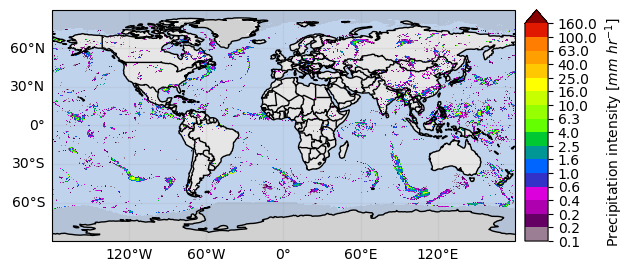

In [21]:
ds[variable].isel(time=0).gpm.plot_map()    # With cartopy

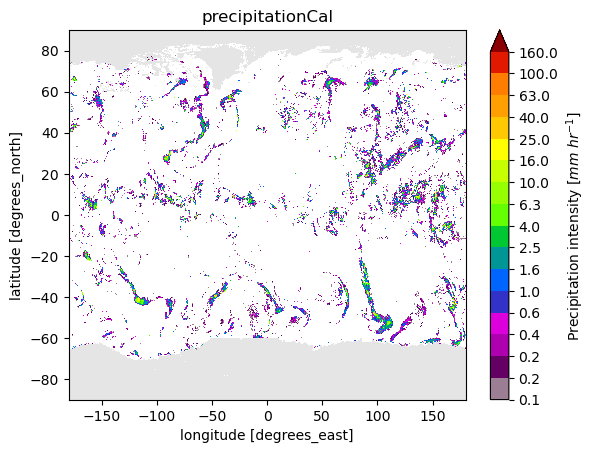

In [22]:
ds[variable].isel(time=0).gpm.plot_image()  # Without cartopy

To plot multiple timesteps, it is necessary to specify the argument `col` and `col_wrap` or `row` and `row_wrap`.
The `col`/`row` argument specifies the dimension to be used to plot over the columns/rows, while the `col_wrap`/`row_wrap` argument enables to specify the number of plots to be displayed per column/row.

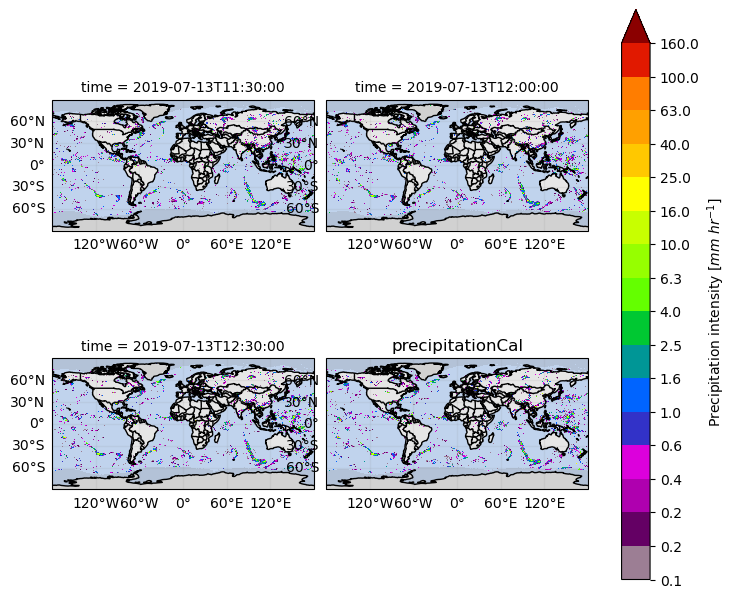

In [23]:
ds[variable].isel(time=slice(0,4)).gpm.plot_map(col="time", col_wrap=2)

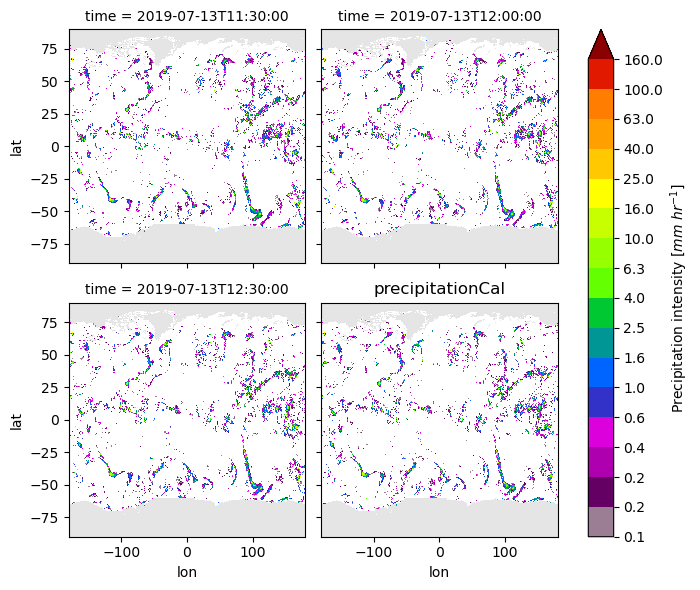

In [24]:
ds[variable].isel(time=slice(0,4)).gpm.plot_image(col="time", col_wrap=2)

To facilitate the creation of a figure title, GPM-API also provide a `title` method:

In [25]:
# Title for multi-timestep dataset
# - The add_timestep argument is not exploited !
print(ds[variable].gpm.title(add_timestep=False))
print(ds[variable].gpm.title(add_timestep=True))

IMERG-FR PrecipitationCal
IMERG-FR PrecipitationCal


In [26]:
# Title for a single-timestep dataset
print(ds[variable].isel(time=0).gpm.title(add_timestep=True))

IMERG-FR PrecipitationCal (2019-07-13 11:30)


To instead zoom on a specific regions of a `plot_map` figure, you can use the axis method `set_extent`. 

Extent:  (-171.99111060299998, -66.76465999999999, 18.71619, 71.5577635769)


Text(0.5, 1.0, 'IMERG-FR')

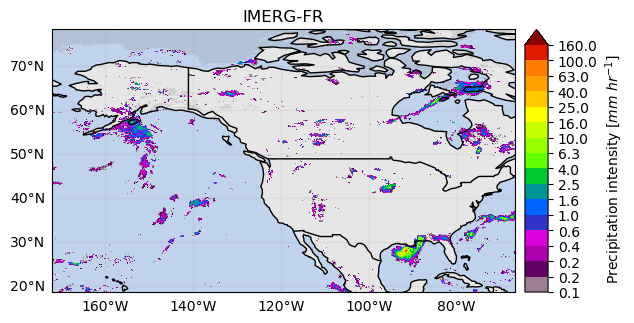

In [28]:
from gpm.utils.geospatial import get_country_extent

title = ds.gpm.title(add_timestep=False)
extent = get_country_extent("United States")
print("Extent: ", extent)
da = ds[variable].isel(time=0)
p = da.gpm.plot_map()
p.axes.set_extent(extent)
p.axes.set_title(label=title)


You can also customize the geographic projection, by specifying the wished Cartopy projection.
The available projections are [listed here]( https://scitools.org.uk/cartopy/docs/latest/reference/projections.html?highlight=projections)

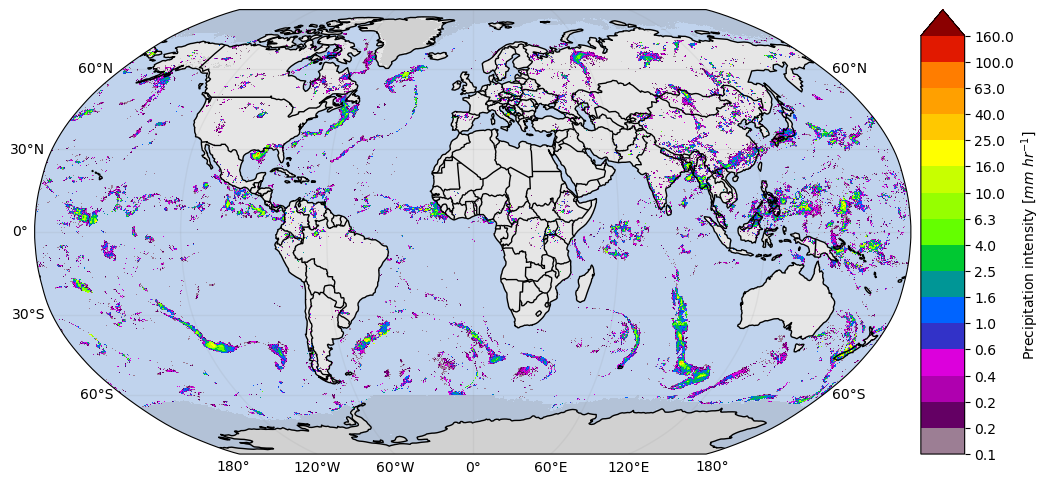

In [29]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

from gpm.visualization.plot import plot_cartopy_background

# Define some figure options
dpi = 100
figsize = (12, 10)

# Examples of Cartopy projections
crs_proj = ccrs.InterruptedGoodeHomolosine()
crs_proj = ccrs.Mollweide()
crs_proj = ccrs.Robinson()

# Select a single timestep
da = ds[variable].isel(time=0)

# Create the map
fig, ax = plt.subplots(subplot_kw={"projection": crs_proj}, figsize=figsize, dpi=dpi)
plot_cartopy_background(ax)
da.gpm.plot_map(ax=ax)

It is possible to further customize these figures in multiply ways. For example by specifying the own colormap:

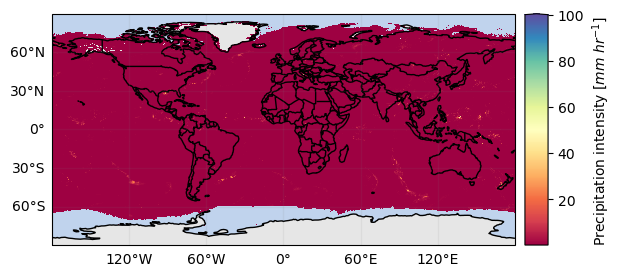

In [30]:
da = ds[variable].isel(time=0)
da.gpm.plot_map(cmap="Spectral", vmin=0.1, vmax=100)

However, note that GPM-API can provide a large set of pre-defined colormaps and colorbar settings.
For example, you can retrieve the colormap used originally by NASA to display the IMERG product:

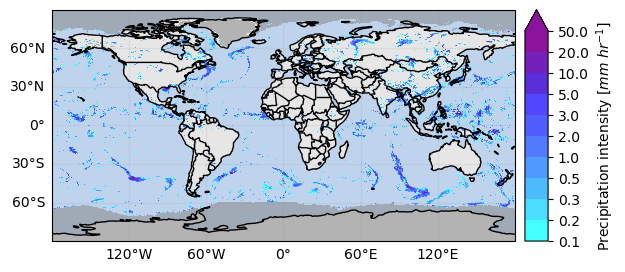

In [31]:
plot_kwargs, cbar_kwargs =  gpm.get_plot_kwargs("IMERG_Solid")
da.gpm.plot_map(cbar_kwargs=cbar_kwargs, **plot_kwargs)

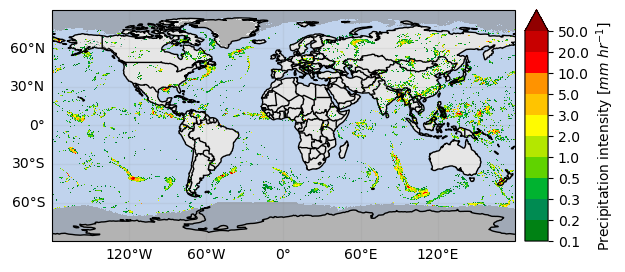

In [32]:
plot_kwargs, cbar_kwargs =  gpm.get_plot_kwargs("IMERG_Liquid")
da.gpm.plot_map(cbar_kwargs=cbar_kwargs, **plot_kwargs)

With some manipulations, it's possible to display a single map showing the phase of precipitation using the `probabilityLiquidPrecipitation` variable.

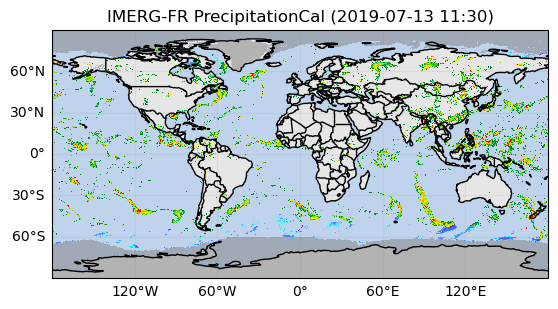

In [33]:
ds_single_timestep = ds.isel(time=0)
da_is_liquid = ds_single_timestep["probabilityLiquidPrecipitation"] > 90
da_precip = ds_single_timestep[variable]
da_liquid = da_precip.where(da_is_liquid, 0) # set to 0 where is not True
da_solid = da_precip.where(~da_is_liquid, 0) # set to 0 where is True

plot_kwargs, cbar_kwargs =  gpm.get_plot_kwargs("IMERG_Liquid")
p = da_liquid.gpm.plot_map(cbar_kwargs=cbar_kwargs, **plot_kwargs, add_colorbar=False)
plot_kwargs, cbar_kwargs =  gpm.get_plot_kwargs("IMERG_Solid")
p = da_solid.gpm.plot_map(ax=p.axes, cbar_kwargs=cbar_kwargs, **plot_kwargs, add_colorbar=False)
_ = p.axes.set_title(label=da_solid.gpm.title())

## 5. Dataset Cropping

GPM-API provides methods to spatially subset the data by extent, country or continent.

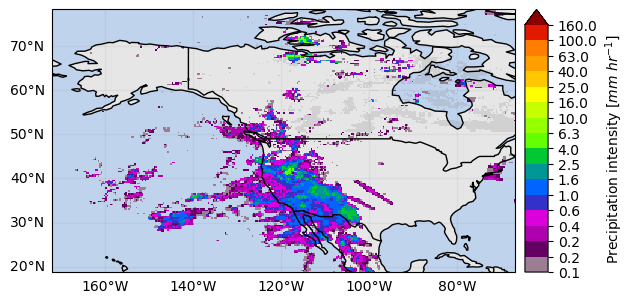

In [34]:
# Crop by extent
extent = get_country_extent("United States")
ds_us = ds.gpm.crop(extent=extent)
ds_us[variable].isel(time=0).gpm.plot_map()


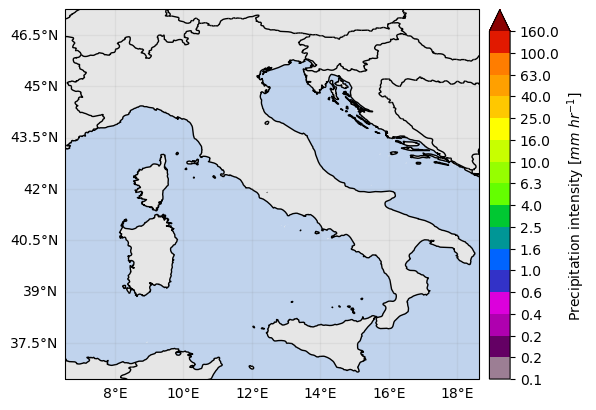

In [35]:
# Crop by country name
ds_it = ds.gpm.crop_by_country("Italy")
ds_it[variable].isel(time=0).gpm.plot_map()

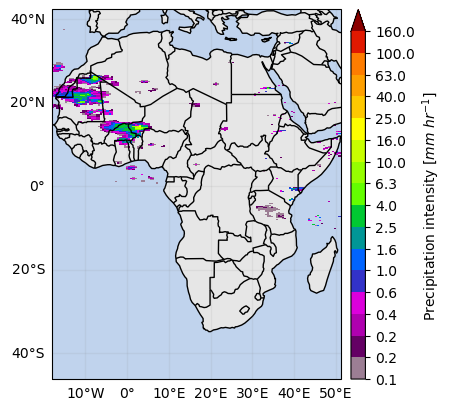

In [36]:
# Crop by continent
ds_it = ds.gpm.crop_by_continent("Africa")
ds_it[variable].isel(time=0).gpm.plot_map()

## 6. Identify Precipitating Areas  
## 7. Extract  Patches 


GPM-API comes with utilities helping the extraction and tracking of precipitating areas. 
Go through the dedicated tutorial to discover all the details !!!

To perform climatological analysis using IMERG, please rread also the following dedicated tutorials 
- TODO
- TODO